In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv",skipinitialspace = True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [4]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [5]:
train_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
print(train_data.describe())
print(train_data.describe(include=['O']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                           Name   Sex Embarked
count                       891   

In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv", skipinitialspace = True)
test_data = test_data.drop(['Ticket', 'Cabin'], axis = 1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [9]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [10]:
print(train_data['Sex'].value_counts())
print(train_data['Embarked'].value_counts())
print(train_data['Pclass'].value_counts())
print(train_data['Survived'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [11]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [12]:
train_data.loc[train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,80.0,NaN


In [13]:
train_data.loc[train_data['Pclass'] == 1, 'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [14]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
train_data.head(), test_data.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    0  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
 2                             Heikkinen, Miss. Laina    1  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
 4                           Allen, Mr. William Henry    0  35.0      0      0   
 
       Fare  Embarked  
 0   7.2500         0  
 1  71.2833         1  
 2   7.9250         0  
 3  53.1000         0  
 4   8.0500         0  ,
    PassengerId  Pclass                                          Name  Sex  \
 0          892       3                              Kelly,

<AxesSubplot:>

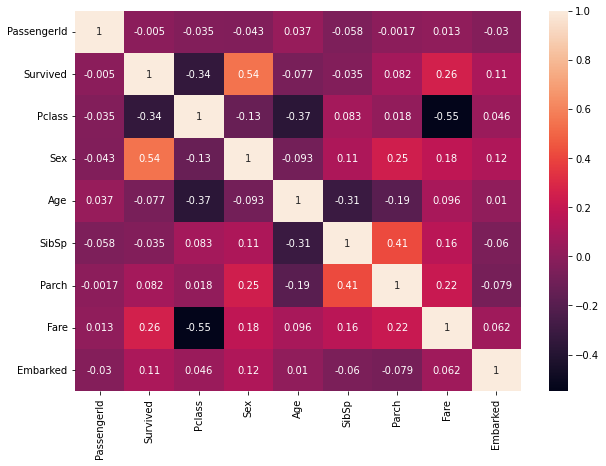

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

crr = train_data.corr(method = 'pearson')
plt.figure(figsize = (10, 7))
sns.heatmap(crr, annot = True)

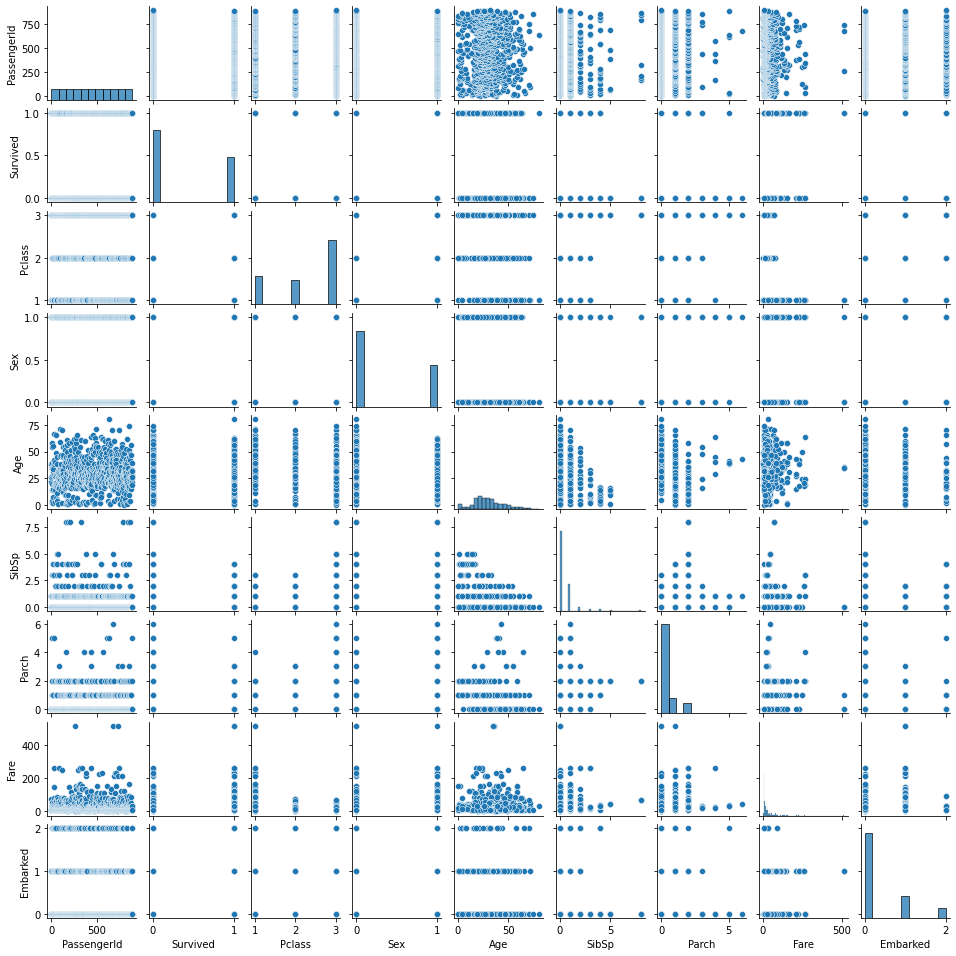

In [16]:
sns.pairplot(train_data, height=1.5)
plt.show()

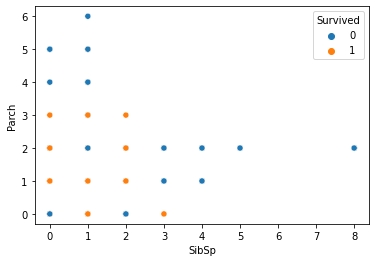

In [17]:
g = sns.scatterplot(x = 'SibSp', y = 'Parch', data = train_data, hue = "Survived")

In [18]:
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
train_data[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [20]:
train_data[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [21]:
train_data[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train_data[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


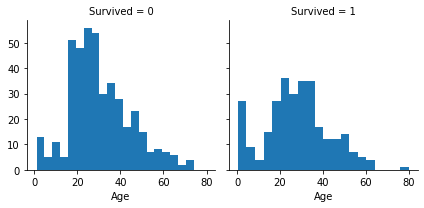

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
g = sns.FacetGrid(train_data, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

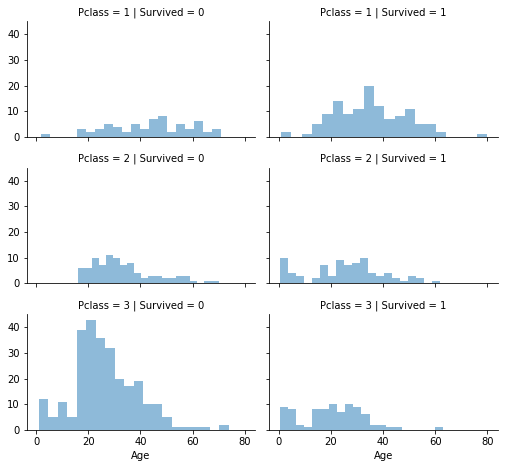

In [24]:
grid = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

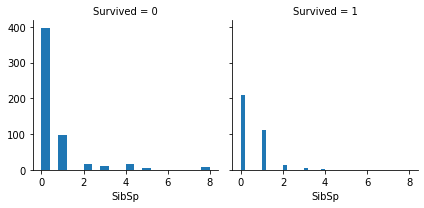

In [25]:
g = sns.FacetGrid(train_data, col = 'Survived')
g.map(plt.hist, 'SibSp', bins = 20)

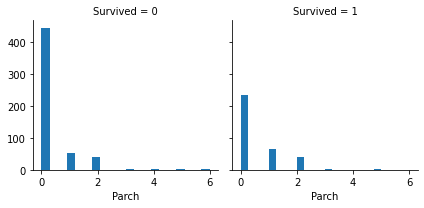

In [26]:
g = sns.FacetGrid(train_data, col = 'Survived')
g.map(plt.hist, 'Parch', bins = 20)

In [27]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [28]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')
print(train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.704301
2      Mr  0.156673
3     Mrs  0.792000
4    Rare  0.347826


In [29]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
print(train_data['Title'].value_counts())

1    517
2    186
3    125
4     40
5     23
Name: Title, dtype: int64


In [30]:
train_data[['Title','Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
2,3,0.792000
1,2,0.704301
3,4,0.575000
4,5,0.347826
0,1,0.156673


In [31]:
train_data = train_data.drop(['Title'], axis = 1)
test_data = test_data.drop(['Title'], axis = 1)
combine = [train_data, test_data]

train_data.head(5), test_data.head(5)

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    0  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
 2                             Heikkinen, Miss. Laina    1  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
 4                           Allen, Mr. William Henry    0  35.0      0      0   
 
       Fare  Embarked  
 0   7.2500         0  
 1  71.2833         1  
 2   7.9250         0  
 3  53.1000         0  
 4   8.0500         0  ,
    PassengerId  Pclass                                          Name  Sex  \
 0          892       3                              Kelly,

In [32]:
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)
combine = [train_data, test_data]

train_data.head(5), test_data.head(5)

(   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0            1         0       3    0  22.0      1      0   7.2500         0
 1            2         1       1    1  38.0      1      0  71.2833         1
 2            3         1       3    1  26.0      0      0   7.9250         0
 3            4         1       1    1  35.0      1      0  53.1000         0
 4            5         0       3    0  35.0      0      0   8.0500         0,
    PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0          892       3    0  34.5      0      0   7.8292         2
 1          893       3    1  47.0      1      0   7.0000         0
 2          894       2    0  62.0      0      0   9.6875         2
 3          895       3    0  27.0      0      0   8.6625         0
 4          896       3    1  22.0      1      1  12.2875         0)

In [33]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/ 0.5 +0.5)*0.5
for dataset in combine:
    for i in range (0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age']= guess_ages[i,j].astype(int)
    
train_data['Age Band'] = pd. cut(train_data['Age'], 5)
train_data[['Age Band', 'Survived']].groupby(['Age Band'], as_index = False).mean().sort_values(by = 'Age Band', ascending = True)

,Age Band,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [34]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Band
0,1,0,3,0,1.0,1,0,7.2500,0,"(16.336, 32.252]"
1,2,1,1,1,2.0,1,0,71.2833,1,"(32.252, 48.168]"
2,3,1,3,1,1.0,0,0,7.9250,0,"(16.336, 32.252]"
3,4,1,1,1,2.0,1,0,53.1000,0,"(32.252, 48.168]"
4,5,0,3,0,2.0,0,0,8.0500,0,"(32.252, 48.168]"


In [35]:
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)

train_data.head(5), test_data.head(10)

(   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  \
 0            1         0       3    0    1      1      0   7.2500         0   
 1            2         1       1    1    2      1      0  71.2833         1   
 2            3         1       3    1    1      0      0   7.9250         0   
 3            4         1       1    1    2      1      0  53.1000         0   
 4            5         0       3    0    2      0      0   8.0500         0   
 
            Age Band  
 0  (16.336, 32.252]  
 1  (32.252, 48.168]  
 2  (16.336, 32.252]  
 3  (32.252, 48.168]  
 4  (32.252, 48.168]  ,
    PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
 0          892       3    0    2      0      0   7.8292         2
 1          893       3    1    2      1      0   7.0000         0
 2          894       2    0    3      0      0   9.6875         2
 3          895       3    0    1      0      0   8.6625         0
 4          896       3    1    1      1    

In [36]:
train_data = train_data.drop(['Age Band'],axis =1)
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,7.2500,0
1,2,1,1,1,2,1,0,71.2833,1
2,3,1,3,1,1,0,0,7.9250,0
3,4,1,1,1,2,1,0,53.1000,0
4,5,0,3,0,2,0,0,8.0500,0


In [37]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace = True)
train_data.describe(), test_data.describe()

(       PassengerId    Survived      Pclass         Sex         Age  \
 count   891.000000  891.000000  891.000000  891.000000  891.000000   
 mean    446.000000    0.383838    2.308642    0.352413    1.324355   
 std     257.353842    0.486592    0.836071    0.477990    0.820565   
 min       1.000000    0.000000    1.000000    0.000000    0.000000   
 25%     223.500000    0.000000    2.000000    0.000000    1.000000   
 50%     446.000000    0.000000    3.000000    0.000000    1.000000   
 75%     668.500000    1.000000    3.000000    1.000000    2.000000   
 max     891.000000    1.000000    3.000000    1.000000    4.000000   
 
             SibSp       Parch        Fare    Embarked  
 count  891.000000  891.000000  891.000000  891.000000  
 mean     0.523008    0.381594   32.204208    0.361392  
 std      1.102743    0.806057   49.693429    0.635673  
 min      0.000000    0.000000    0.000000    0.000000  
 25%      0.000000    0.000000    7.910400    0.000000  
 50%      0.00000

In [38]:
train_data.loc[train_data['Fare'] > 100][['Fare', 'Pclass']].groupby('Pclass').count()

,Fare
Pclass,
1,53


In [39]:
p1 = train_data.loc[train_data['Pclass'] == 1][['Fare']].describe() 
p2 = train_data.loc[train_data['Pclass'] == 2][['Fare']].describe() 
p3 = train_data.loc[train_data['Pclass'] == 3][['Fare']].describe() 

p = pd.concat([p1, p2,p3], axis = 1)
p

,Fare,Fare,Fare
count,216.000000,184.000000,491.000000
mean,84.154687,20.662183,13.675550
std,78.380373,13.417399,11.778142
min,0.000000,0.000000,0.000000
25%,30.923950,13.000000,7.750000
50%,60.287500,14.250000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


In [40]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 10)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)

,FareBand,Survived
0,"(-0.001, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27.0]",0.516854
7,"(27.0, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


In [41]:
train_data.loc[(train_data['Pclass'] == 1) & (train_data['Fare'] <= 25.0)][['Fare']]

,Fare
263,0.0
633,0.0
806,0.0
815,0.0
822,0.0
872,5.0


In [42]:
train_data.loc[(train_data['Pclass'] == 2) & (train_data['Fare'] <= 10.0)][['Fare']]

,Fare
277,0.0
413,0.0
466,0.0
481,0.0
674,0.0
732,0.0


In [43]:
train_data.loc[(train_data['Pclass'] == 3) & (train_data['Fare'] <= 4.0)][['Fare']]

,Fare
179,0.0
271,0.0
302,0.0
597,0.0


In [44]:
p1m = train_data.loc[(train_data['Pclass'] == 1) & (train_data['Fare'] >= 25.0)][['Fare']].mean()[0]
p2m = train_data.loc[(train_data['Pclass'] == 2) & (train_data['Fare'] >= 10.0)][['Fare']].mean()[0]
p3m = train_data.loc[(train_data['Pclass'] == 3) & (train_data['Fare'] >= 4.0)][['Fare']].mean()[0]
p1m, p2m, p3m

(86.53529761904754, 21.358661235955054, 13.787874948665301)

In [45]:
train_data.loc[(train_data['Pclass'] == 3) & (train_data['Fare'] <= 4.0) , 'Fare'] = p3m
train_data.loc[(train_data['Pclass'] == 2) & (train_data['Fare'] <= 10.0) , 'Fare'] = p2m
train_data.loc[(train_data['Pclass'] == 1) & (train_data['Fare'] <= 25.0) , 'Fare'] = p1m

train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,1.324355,0.523008,0.381594,32.987053,0.361392
std,257.353842,0.486592,0.836071,0.477990,0.820565,1.102743,0.806057,49.726551,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.012500,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,7.925000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,31.275000,1.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,512.329200,2.000000


In [46]:
train_data.loc[train_data['Fare'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand


In [47]:
train_data.loc[(train_data['Pclass'] == 1) & (train_data.Fare.isnull()), 'Fare'] = p1m
train_data.loc[(train_data['Pclass'] == 2) & (train_data.Fare.isnull()), 'Fare'] = p2m
train_data.loc[(train_data['Pclass'] == 3) & (train_data.Fare.isnull()), 'Fare'] = p3m

train_data.loc[train_data['Fare'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand


In [48]:
test_data.loc[(test_data['Pclass'] == 3) & (test_data['Fare'] <= 4.0) , 'Fare'] = p3m
test_data.loc[(test_data['Pclass'] == 2) & (test_data['Fare'] <= 10.0) , 'Fare'] = p2m
test_data.loc[(test_data['Pclass'] == 1) & (test_data['Fare'] <= 25.0) , 'Fare'] = p1m

test_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.325359,0.447368,0.392344,36.043901,0.464115
std,120.810458,0.841838,0.481622,0.767679,0.896760,0.981429,55.882885,0.685516
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.437500,0.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,0.000000,1.000000,0.000000,0.000000,14.479150,0.000000
75%,1204.750000,3.000000,1.000000,2.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,1.000000,4.000000,8.000000,9.000000,512.329200,2.000000


In [49]:
test_data.loc[test_data['Fare'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [50]:
combine = [train_data, test_data]

In [51]:
for dataset in combine:
    dataset.loc[train_data['Fare'] <= 7.55, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.55) & (dataset['Fare'] <= 7.854), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 8.05), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 10.5), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 14.454), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 21.679), 'Fare'] = 5
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 27.0), 'Fare'] = 6
    dataset.loc[(dataset['Fare'] > 27.0) & (dataset['Fare'] <= 39.688), 'Fare'] = 7
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 77.958), 'Fare'] = 8
    dataset.loc[dataset['Fare'] >= 77.958, 'Fare'] = 9
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_data.head(), test_data.head()

(   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  \
 0            1         0       3    0    1      1      0     0         0   
 1            2         1       1    1    2      1      0     8         1   
 2            3         1       3    1    1      0      0     2         0   
 3            4         1       1    1    2      1      0     8         0   
 4            5         0       3    0    2      0      0     2         0   
 
            FareBand  
 0    (-0.001, 7.55]  
 1  (39.688, 77.958]  
 2     (7.854, 8.05]  
 3  (39.688, 77.958]  
 4     (7.854, 8.05]  ,
    PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
 0          892       3    0    2      0      0     0         2
 1          893       3    1    2      1      0     7         0
 2          894       2    0    3      0      0     0         2
 3          895       3    0    1      0      0     3         0
 4          896       3    1    1      1      1     0         0)

In [52]:
train_data = train_data.drop(['FareBand'], axis = 1)
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,2,1,0,8,1
2,3,1,3,1,1,0,0,2,0
3,4,1,1,1,2,1,0,8,0
4,5,0,3,0,2,0,0,2,0


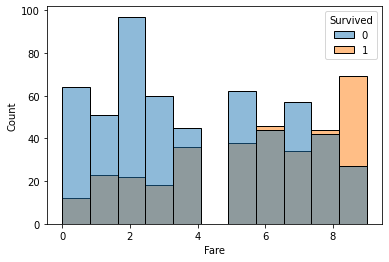

In [53]:
g = sns.histplot(x = 'Fare', data = train_data, hue = "Survived")

In [54]:
train_data['FamilySize'] = (train_data['SibSp'] + train_data['Parch'] + 1).astype(int)
test_data['FamilySize'] = (test_data['SibSp'] + test_data['Parch'] + 1).astype(int)
train_data.head(5), test_data.head(5), 

(   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  \
 0            1         0       3    0    1      1      0     0         0   
 1            2         1       1    1    2      1      0     8         1   
 2            3         1       3    1    1      0      0     2         0   
 3            4         1       1    1    2      1      0     8         0   
 4            5         0       3    0    2      0      0     2         0   
 
    FamilySize  
 0           2  
 1           2  
 2           1  
 3           2  
 4           1  ,
    PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize
 0          892       3    0    2      0      0     0         2           1
 1          893       3    1    2      1      0     7         0           2
 2          894       2    0    3      0      0     0         2           1
 3          895       3    0    1      0      0     3         0           1
 4          896       3    1    1      1      1     0

In [55]:
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


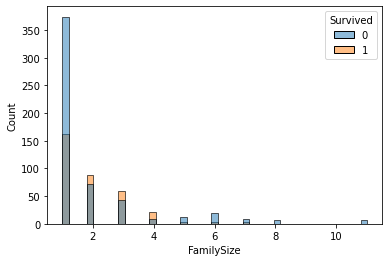

In [56]:
g = sns.histplot(x = 'FamilySize', data = train_data, hue = "Survived")

In [57]:
train_data = train_data.drop(['FamilySize'], axis = 1)
test_data = test_data.drop(['FamilySize'], axis = 1)
train_data.head(5), test_data.head(5)

(   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
 0            1         0       3    0    1      1      0     0         0
 1            2         1       1    1    2      1      0     8         1
 2            3         1       3    1    1      0      0     2         0
 3            4         1       1    1    2      1      0     8         0
 4            5         0       3    0    2      0      0     2         0,
    PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
 0          892       3    0    2      0      0     0         2
 1          893       3    1    2      1      0     7         0
 2          894       2    0    3      0      0     0         2
 3          895       3    0    1      0      0     3         0
 4          896       3    1    1      1      1     0         0)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [59]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis = 1)
y_train = train_data['Survived'].values.reshape(-1,)
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [60]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,0,0
1,1,1,2,1,0,8,1
2,3,1,1,0,0,2,0
3,1,1,2,1,0,8,0
4,3,0,2,0,0,2,0
...,...,...,...,...,...,...,...
886,2,0,1,0,0,4,0
887,1,1,1,0,0,7,0
888,3,1,1,1,2,6,0
889,1,0,1,0,0,7,1


In [61]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_train)
mean_accuracy_log = model_log.score(X_train, y_train)
f1_log = f1_score(y_train, y_pred_log)
print("mean_accuracy_log:", mean_accuracy_log)
print("f1_log:", f1_log)

mean_accuracy_log: 0.8035914702581369
f1_log: 0.7336377473363775


In [62]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Features']
coeff_df['Correlation'] = pd.Series(model_log.coef_[0])
coeff_df.sort_values(by = 'Correlation', ascending = False)
coeff_df

,Features,Correlation
0,Pclass,-1.126855
1,Sex,2.599004
2,Age,-0.654501
3,SibSp,-0.341589
4,Parch,-0.069551
5,Fare,0.041764
6,Embarked,0.233086


In [63]:
model_logcv = LogisticRegressionCV(cv = 5, random_state = 0)
model_logcv.fit(X_train, y_train)
y_pred_logcv = model_logcv.predict(X_train)
mean_accuracy_logcv = model_logcv.score(X_train, y_train)
f1_logcv = f1_score(y_train, y_pred_log)
s_logcv = cross_val_score(model_logcv, X_train, y_train, cv = 5).mean()
print("mean_accuracy_logcv:", mean_accuracy_log)
print("f1_logcv:", f1_log)
print("mean_cross_val_score_logcv:", s_logcv)

mean_accuracy_logcv: 0.8035914702581369
f1_logcv: 0.7336377473363775
mean_cross_val_score_logcv: 0.7968614650681063


In [64]:
model_sgd = SGDClassifier()
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_train)
mean_accuracy_sgd = model_sgd.score(X_train, y_train)
f1_sgd = f1_score(y_train, y_pred_sgd)
print("mean_accuracy_sgd:", mean_accuracy_sgd)
print("f1_sgd:", f1_sgd)

mean_accuracy_sgd: 0.8047138047138047
f1_sgd: 0.7255520504731862


In [65]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_train)
mean_accuracy_svc = model_svc.score(X_train, y_train)
f1_svc = f1_score(y_train, y_pred_svc)
s_svc = cross_val_score(model_svc, X_train, y_train, cv = 5).mean()
print("mean_accuracy_svc:", mean_accuracy_svc)
print("f1_svc:", f1_svc)
print("mean_cross_val_score_svc:", s_svc)

mean_accuracy_svc: 0.8047138047138047
f1_svc: 0.7255520504731862
mean_cross_val_score_svc: 0.8024543343167411


In [66]:
model_lsvc = LinearSVC(max_iter = 5000)
model_lsvc.fit(X_train, y_train)
y_pred_lsvc = model_lsvc.predict(X_train)
mean_accuracy_lsvc = model_lsvc.score(X_train, y_train)
f1_lsvc = f1_score(y_train, y_pred_lsvc)
s_lsvc = cross_val_score(model_lsvc, X_train, y_train, cv = 5).mean()
print("mean_accuracy_lsvc:", mean_accuracy_lsvc)
print("f1_lsvc:", f1_lsvc)
print("mean_cross_val_score_lsvc:", s_lsvc)

mean_accuracy_lsvc: 0.8013468013468014
f1_lsvc: 0.7297709923664122
mean_cross_val_score_lsvc: 0.7934906785512523


In [67]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_train)
mean_accuracy_knn = model_knn.score(X_train, y_train)
f1_knn = f1_score(y_train, y_pred_knn)
s_knn = cross_val_score(model_knn, X_train, y_train, cv = 5).mean()
print("mean_accuracy_knn:", mean_accuracy_knn)
print("f1_knn:", f1_knn)
print("mean_cross_val_score_knn:", s_knn)

mean_accuracy_knn: 0.8518518518518519
f1_knn: 0.8075801749271136
mean_cross_val_score_knn: 0.7800075324838366


In [68]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_train)
mean_accuracy_gnb = model_gnb.score(X_train, y_train)
f1_gnb = f1_score(y_train, y_pred_gnb)
s_gnb = cross_val_score(model_gnb, X_train, y_train, cv = 5).mean()
print("mean_accuracy_gnb:", mean_accuracy_gnb)
print("f1_gnb:", f1_gnb)
print("mean_cross_val_score_gnb:", s_gnb)

mean_accuracy_gnb: 0.7643097643097643
f1_gnb: 0.7222222222222222
mean_cross_val_score_gnb: 0.765457284539577


In [69]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_train)
mean_accuracy_dt = model_dt.score(X_train, y_train)
f1_dt = f1_score(y_train, y_pred_dt)
s_dt = cross_val_score(model_dt, X_train, y_train, cv = 5).mean()
print("mean_accuracy_dt:", mean_accuracy_dt)
print("f1_dt:", f1_dt)
print("mean_cross_val_score_dt:", s_dt)

mean_accuracy_dt: 0.8956228956228957
f1_dt: 0.8530805687203792
mean_cross_val_score_dt: 0.7878727010231624


In [70]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_train)
mean_accuracy_rf = model_rf.score(X_train, y_train)
f1_rf = f1_score(y_train, y_pred_rf)
s_rf = cross_val_score(model_rf, X_train, y_train, cv = 5).mean()
print("mean_accuracy_rf:", mean_accuracy_rf)
print("f1_rf:", f1_rf)
print("mean_cross_val_score_rf:", s_rf)

mean_accuracy_rf: 0.8956228956228957
f1_rf: 0.8575803981623276
mean_cross_val_score_rf: 0.8013181846713955


In [71]:
model_rf1 = RandomForestClassifier(n_estimators = 100, max_features = 5, random_state = 1)
model_rf1.fit(X_train, y_train)
y_pred_rf1 = model_rf1.predict(X_train)
mean_accuracy_rf1 = model_rf1.score(X_train, y_train)
f1_rf1 = f1_score(y_train, y_pred_rf1)
s_rf1 = cross_val_score(model_rf1, X_train, y_train, cv = 5).mean()
print("mean_accuracy_rf1:", mean_accuracy_rf1)
print("f1_rf1:", f1_rf1)
print("mean_cross_val_score_rf1:", s_rf1)

mean_accuracy_rf1: 0.8956228956228957
f1_rf1: 0.8575803981623276
mean_cross_val_score_rf1: 0.797966229364133


In [72]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
para_grid = {'n_neighbors': np.arange(2, 10)}
knn_gscv = GridSearchCV(knn2, para_grid)
knn_gscv.fit(X_train, y_train)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 9}
0.7890151277383718


In [73]:
model_knn2 = KNeighborsClassifier(n_neighbors  = knn_gscv.best_params_['n_neighbors'])
model_knn2.fit(X_train, y_train)
y_pred_knn2 = model_knn2.predict(X_train)
mean_accuracy_knn2 = model_knn2.score(X_train, y_train)
f1_knn2 = f1_score(y_train, y_pred_knn2)
s_knn2 = cross_val_score(model_knn2, X_train, y_train, cv = 5).mean()
print("mean_accuracy_knn2:", mean_accuracy_knn2)
print("f1_knn2:", f1_knn2)
print("mean_cross_val_score_knn2:", s_knn2)

mean_accuracy_knn2: 0.8361391694725028
f1_knn2: 0.7711598746081504
mean_cross_val_score_knn2: 0.7890151277383718


In [74]:
from sklearn.metrics import confusion_matrix
cnfs = confusion_matrix(y_train, y_pred_rf)
cnfs

array([[518,  31],
       [ 62, 280]])

In [75]:
X_test = pd.get_dummies(test_data.drop(['PassengerId'], axis = 1))
predictions = model_rf.predict(X_test)
final = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
final.to_csv('submission.csv', index=False)